# Sentiment Analysis of Movie Review Dataset

*Sentiment analysis, a branch of natural language processing, involves the use of algorithms to determine the emotional tone behind a piece of text. By analyzing keywords, context, and linguistic patterns, sentiment analysis can identify whether the sentiment expressed is positive, negative, or neutral. This powerful tool finds widespread application in social media monitoring, customer feedback analysis, and market research. Understanding public sentiment enables businesses to gauge their reputation, improve customer experiences, and make data-driven decisions. While not flawless, sentiment analysis continues to evolve, integrating machine learning and AI advancements to better comprehend complex human emotions*

**Problem Statement:**
*Our Movie review dataset consists of 2000 moviereviews  along with 
their sentiment label .Our aim is to build a model that will classify the 
review provided as positive or negative.*

In [1]:
#Importing necessary Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the Dataset
df=pd.read_csv("moviereviews.csv")
df.head(5)

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


###  Exploratory Data Analysis of the Data Set

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
#Structure of the dataframe
df.shape

(2000, 2)

In [5]:
#Checking the columns
df.columns

Index(['label', 'review'], dtype='object')

In [6]:
#Checking for null values
df.isna().sum()

#It is evident that there are 35 moviereviews without any review 
#It will be good choice to drop that rows

df.dropna(inplace=True)



In [7]:
#The 35 null values had been dropped from the dataframe
df.shape

(1965, 2)

In [8]:
#There are 27 rows where reviews are not provided
print(df["review"].str.isspace().sum())
df[df['review'].str.isspace()]


27


,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


In [9]:
#Removing the blank reviews
df.drop(df[df['review'].str.isspace()].index,inplace=True)

In [10]:
#Checking for the blank reviews
print(df["review"].str.isspace().sum())
df.shape

0


(1938, 2)

In [11]:
df["label"].value_counts()

neg    969
pos    969
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

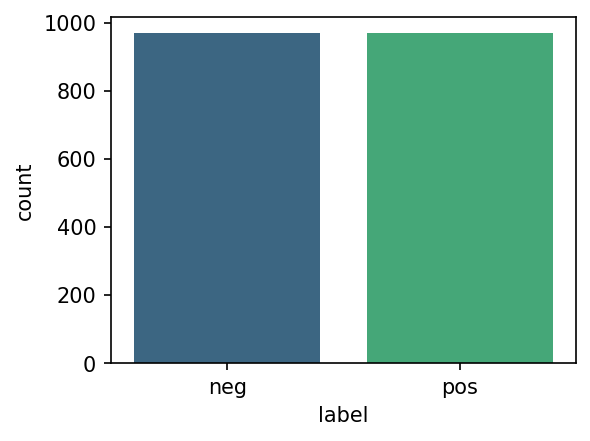

In [12]:
plt.figure(figsize=(4,3),dpi=150)
sns.countplot(data=df,x="label",palette="viridis")

In [13]:
#Importing the count vectorizer 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [14]:
#Find the top 20 words in negative reviews
matrix=cv.fit_transform(df[df['label']=='neg']['review'])
matrix = cv.fit_transform(df[df['label']=='neg']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('the', 33759), ('and', 15007), ('to', 14832), ('of', 14812), ('is', 10791), ('in', 9703), ('that', 7458), ('it', 7420), ('with', 4745), ('as', 4699), ('this', 4694), ('for', 4503), ('film', 4063), ('but', 3965), ('his', 3877), ('he', 3809), ('on', 3526), ('movie', 3131), ('are', 3102), ('be', 3008)]


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [15]:
#Find the top 20 words in positive reviews
matrix = cv.fit_transform(df[df['label']=='pos']['review'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('the', 39883), ('and', 19023), ('of', 17916), ('to', 15926), ('is', 13572), ('in', 11263), ('it', 7893), ('that', 7755), ('as', 6188), ('with', 5616), ('his', 5395), ('for', 5040), ('film', 5002), ('he', 4744), ('this', 4378), ('but', 4286), ('are', 3583), ('on', 3583), ('by', 3345), ('an', 2956)]


### Splitting the data into training and testing sets

In [16]:
from sklearn.model_selection import train_test_split
x=df["review"]
y=df["label"]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

### Vecorization of the text_data

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words="english",ngram_range=(1,1))
train_text=tf.fit_transform(X_train)
test_text=tf.transform(X_test)

In [18]:
train_text

<1550x35075 sparse matrix of type '<class 'numpy.float64'>'
	with 374673 stored elements in Compressed Sparse Row format>

### Comparisons between models

In [19]:
#Linear Support vector Classifier
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(train_text,y_train)


LinearSVC()

In [20]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(train_text,y_train)


MultinomialNB()

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(train_text,y_train)

LogisticRegression(max_iter=1000)

In [22]:
#Metrics
from sklearn.metrics import plot_confusion_matrix,classification_report

In [23]:
#Function to find the metrics
def report(model):
    preds=model.predict(test_text)
    print(classification_report(y_test,preds))
    plot_confusion_matrix(model,test_text,y_test)

Model is  LinearSVC()
              precision    recall  f1-score   support

         neg       0.81      0.84      0.82       191
         pos       0.84      0.81      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.83      0.82      0.82       388

Model is  LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

         neg       0.80      0.85      0.83       191
         pos       0.85      0.79      0.82       197

    accuracy                           0.82       388
   macro avg       0.82      0.82      0.82       388
weighted avg       0.82      0.82      0.82       388

Model is  MultinomialNB()


C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Co

              precision    recall  f1-score   support

         neg       0.78      0.87      0.82       191
         pos       0.86      0.76      0.80       197

    accuracy                           0.81       388
   macro avg       0.82      0.81      0.81       388
weighted avg       0.82      0.81      0.81       388



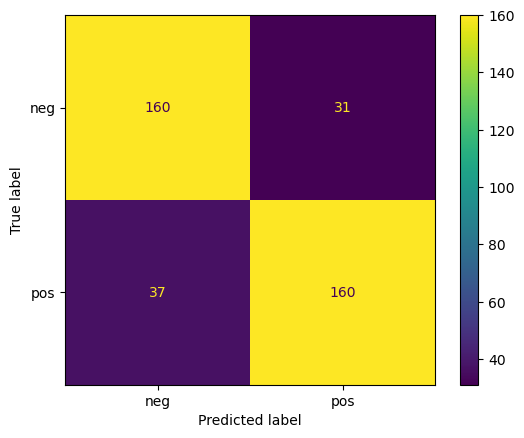

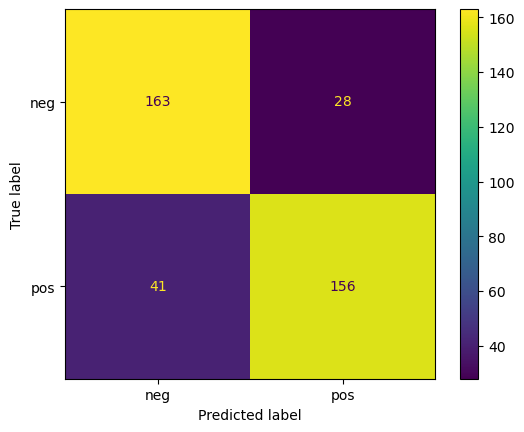

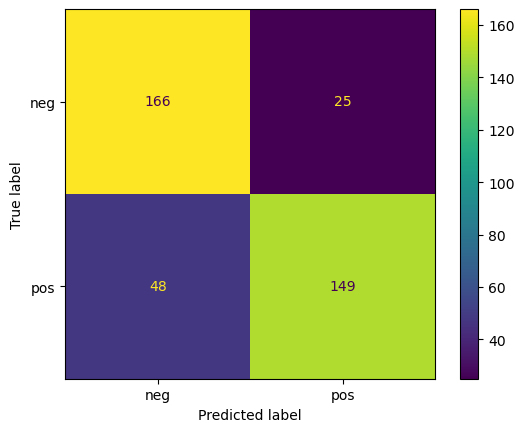

In [24]:
#Running of various models
models=[svc,log,mnb]
for i in models:
    print("Model is ",i)
    report(i)
#All the 3 models performs well     

### : ) Deploying of pipeline for the incoming tweets

In [25]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])
pipe.fit(df["review"],df["label"])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [26]:
#Testing of new reviews
new_review=[" waste of time"]
pipe.predict(new_review)

array(['neg'], dtype=object)

#### **Remarks:**
* The   above model does not account for context in the sentences. Further enhancements could be made to address the issue of context between sentences. The model  relies on tokenization, wherein each sentence is divided into individual words. Consequently, there is a possibility that the model might make incorrect predictions, particularly when positive words are more prevalent in negative reviews. Since the model does not take contextual cues into account, there is always a risk of erroneous predictions.  

### N_gram Approach
**To take into account for the contextual information ,I decided  to go for n_grame approach**


In [27]:
#Using unigrams and bi_grams
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(ngram_range=(1,3))
train_text=tf.fit_transform(X_train)
test_text=tf.transform(X_test)

In [28]:
test_text

<388x1214832 sparse matrix of type '<class 'numpy.float64'>'
	with 334867 stored elements in Compressed Sparse Row format>

In [29]:
#Compatrison_between models
#Linear Support vector Classifier
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(train_text,y_train)

LinearSVC()

In [30]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(train_text,y_train)



LogisticRegression(max_iter=1000)

In [31]:
#Multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(train_text,y_train)

MultinomialNB()

In [32]:
#Metrics
from sklearn.metrics import plot_confusion_matrix,classification_report


Model is  LinearSVC()
              precision    recall  f1-score   support

         neg       0.90      0.74      0.81       191
         pos       0.79      0.92      0.85       197

    accuracy                           0.83       388
   macro avg       0.84      0.83      0.83       388
weighted avg       0.84      0.83      0.83       388

Model is  LogisticRegression(max_iter=1000)
              precision    recall  f1-score   support

         neg       0.87      0.61      0.72       191
         pos       0.71      0.91      0.80       197

    accuracy                           0.76       388
   macro avg       0.79      0.76      0.76       388
weighted avg       0.79      0.76      0.76       388

Model is  MultinomialNB()
              precision    recall  f1-score   support

         neg       0.85      0.81      0.83       191
         pos       0.83      0.86      0.84       197

    accuracy                           0.84       388
   macro avg       0.84      0.84   

C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Co

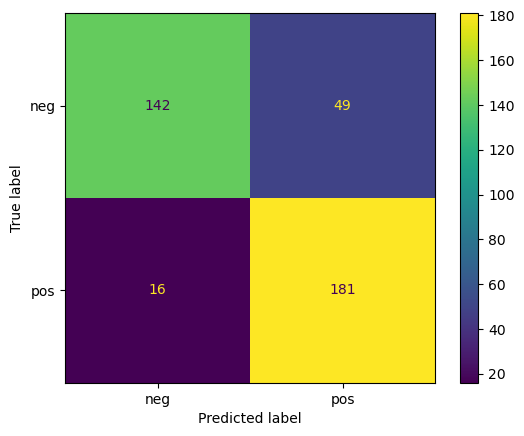

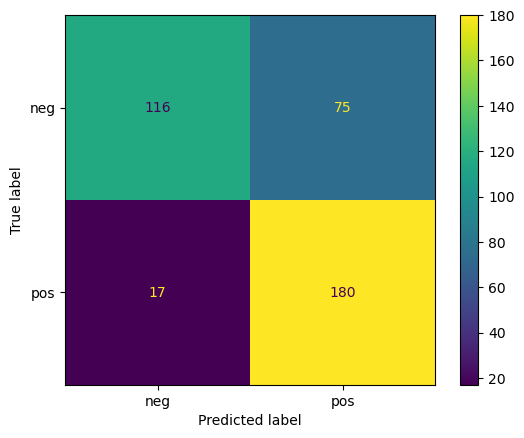

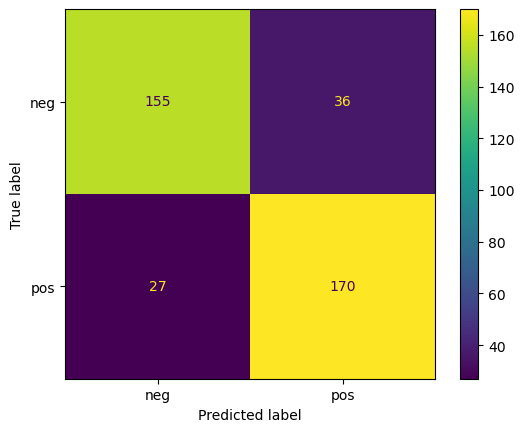

In [33]:
#Running of various models
models=[svc,log,mnb]
for i in models:
    print("Model is ",i)
    report(i)
    
#There was an accuracy increment of 2% in linear svc


In [34]:
#Deployment of pipeline for new reviews
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf',TfidfVectorizer()),('mnb',MultinomialNB())])
pipe.fit(df["review"],df["label"])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('mnb', MultinomialNB())])

In [35]:

#Testing of new reviews
new_review=["  it was a good  movie"]
pipe.predict(new_review)

array(['neg'], dtype='<U3')

In [36]:
#Use of Bert model for word emeddings

In [37]:
be=pd.read_csv("BE_Movie_reviews.csv")

In [41]:
x=be.drop("label",axis=1)
y=be["label"]

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(x, y, test_size=0.2, random_state=101)

In [42]:
#Compatrison_between models
#Linear Support vector Classifier
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(X_train_b,y_train_b)

C:\Users\acer\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [43]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(max_iter=1000)
log.fit(X_train_b,y_train_b)


LogisticRegression(max_iter=1000)

In [45]:
#Function to find the metrics
def report(model):
    preds=model.predict(X_test_b)
    print(classification_report(y_test_b,preds))
    plot_confusion_matrix(model,X_test_b,y_test_b)

              precision    recall  f1-score   support

         neg       0.90      0.74      0.81       191
         pos       0.79      0.92      0.85       197

    accuracy                           0.83       388
   macro avg       0.84      0.83      0.83       388
weighted avg       0.84      0.83      0.83       388



C:\Users\acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


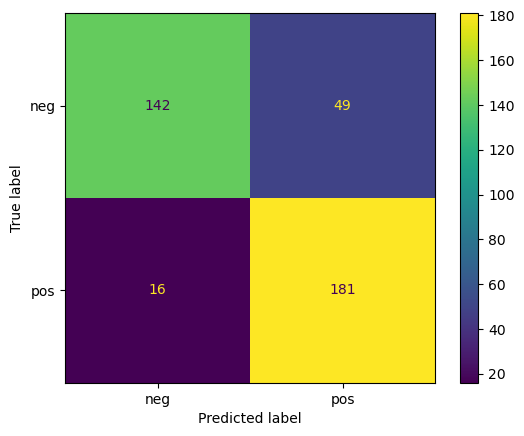

In [38]:
report(svc)

**Final accuracy stands out at 83%**